In [ ]:
# default_exp covid

In [4]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [14]:
#https://covid.ourworldindata.org/data/owid-covid-data.csv
import pandas as pd
import io
import requests
import matplotlib as plt

In [22]:
#hide
url="https://covid.ourworldindata.org/data/owid-covid-data.csv"
s=requests.get(url).content
covid=pd.read_csv(io.StringIO(s.decode('utf-8')))
covid.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN


In [24]:
usa = covid[covid["iso_code"] == "USA"]
usa.tail(20)

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
16109,USA,United States,2020-04-24,869172,26543,49963,3179,2625.876,80.190,150.944,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77
16110,USA,United States,2020-04-25,890524,21352,51017,1054,2690.383,64.507,154.129,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77
16111,USA,United States,2020-04-26,939053,48529,53189,2172,2836.995,146.612,160.691,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77
16112,USA,United States,2020-04-27,965910,26857,54876,1687,2918.134,81.138,165.787,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77
16113,USA,United States,2020-04-28,988451,22541,56245,1369,2986.233,68.099,169.923,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77
16114,USA,United States,2020-04-29,1012583,24132,58355,2110,3059.139,72.906,176.298,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77
16115,USA,United States,2020-04-30,1039909,27326,60966,2611,3141.694,82.555,184.186,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77
16116,USA,United States,2020-05-01,1069826,29917,63006,2040,3232.077,90.383,190.349,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77
16117,USA,United States,2020-05-02,1103781,33955,65068,2062,3334.659,102.582,196.578,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77
16118,USA,United States,2020-05-03,1133069,29288,66385,1317,3423.142,88.483,200.557,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77


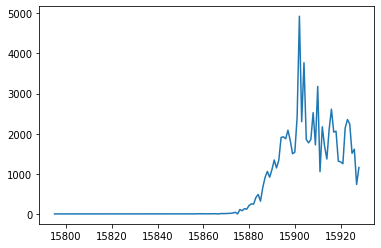

In [15]:
usa.new_deaths.plot()

In [17]:
plt.line(usa.date, usa.new_deaths)
plt.show()

AttributeError: module 'matplotlib' has no attribute 'line'

In [19]:
surl = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
s=requests.get(surl).content
counties=pd.read_csv(io.StringIO(s.decode('utf-8')))
counties.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


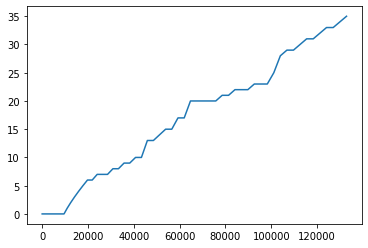

In [21]:
sanfran = counties[counties["county"] == "San Francisco"]
sanfran.deaths.plot()

In [18]:
fig = plt.figure()
ax = plt.axes()
ax.plot(usa.date, usa.new_deaths);

TypeError: 'module' object is not callable